# Essential Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
loan = pd.read_csv(r"C:\Users\Dell\Downloads\Loan payments data.csv")

In [16]:
loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


# DATA INFO

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [18]:
loan.shape

(500, 11)

In [19]:
loan.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [20]:
loan.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [21]:
loan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

# Target Variable Distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_12092\1754611902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=loan, palette="viridis")


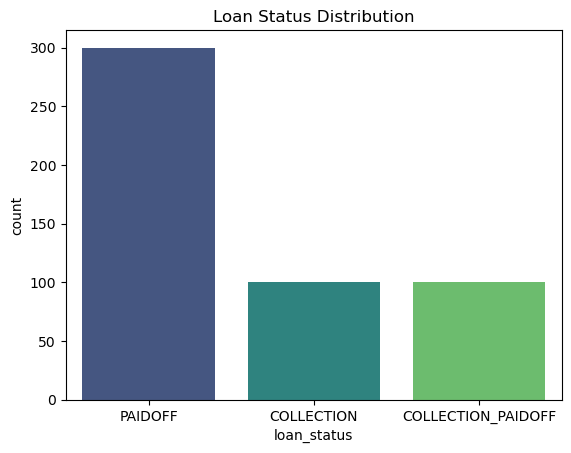

In [23]:
sns.countplot(x="loan_status", data=loan, palette="viridis")
plt.title("Loan Status Distribution")
plt.show()

# Mojority of loans have been paid off ans some portion of status are still at collection

# Gender vs Loan Status

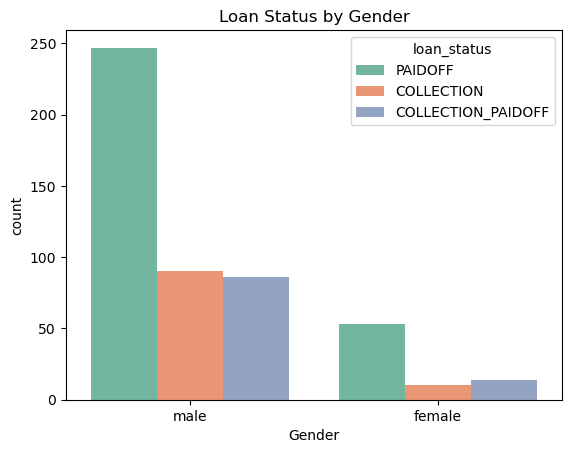

In [24]:
sns.countplot(x="Gender", hue="loan_status", data=loan, palette="Set2")
plt.title("Loan Status by Gender")
plt.show()

# Male gender distribution are dominating the graph with majority with the paid off status

# Education vs Loan status

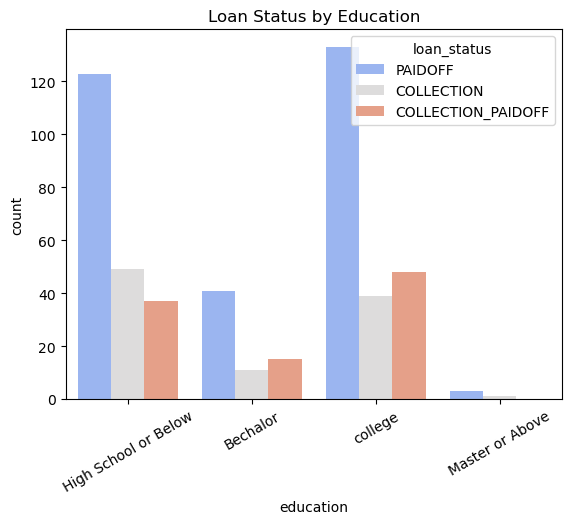

In [25]:
sns.countplot(x="education", hue="loan_status", data=loan, palette="coolwarm")
plt.title("Loan Status by Education")
plt.xticks(rotation=30)
plt.show()

# College students ranks high on the graph with maximum paid off status where are highschoolor below also drived attention with good portion of paid off loans

# Age Distribution

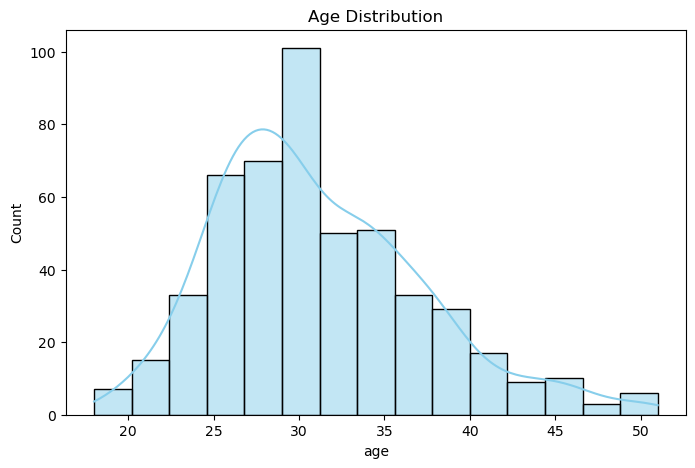

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(loan['age'], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

# Age group can be defined as 20-50 with major contribution age with loan is 35

# Loan Amount vs Default

C:\Users\Dell\AppData\Local\Temp\ipykernel_12092\3639576615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="Principal", data=loan, palette="muted")


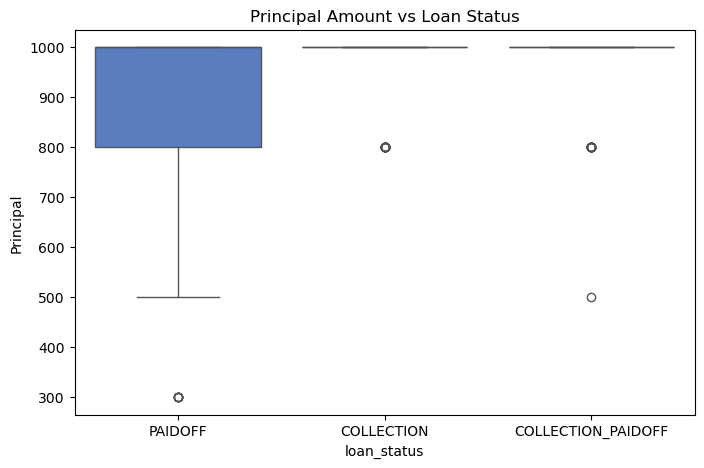

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="Principal", data=loan, palette="muted")
plt.title("Principal Amount vs Loan Status")
plt.show()

# conclusion
The bar for PAIDOFF is the lowest (around 300-400 on the scale). This suggests that loans with a smaller principal amount have a higher chance of being paid off on time.

The bar for COLLECTION is the highest (close to 900). This indicates that loans with a larger principal amount are more likely to end up in default and go to collection.

The bar for COLLECTION_PAIDOFF is in the middle (around 600-700). This makes sense: these are larger loans that were problematic (went to collection) but were eventually resolved. Their principal amount is higher than the always-good loans but lower than the currently problematic ones.

# coorelation Heatmap

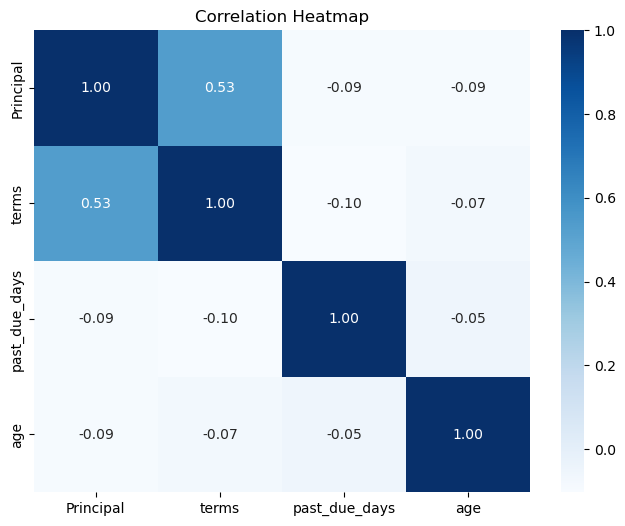

In [30]:
numeric_cols = loan.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Only One Strong Link: The only meaningful relationship detected is between Principal and Terms. Bigger loans come with longer repayment periods.